## Captura de datos

Descarga y tratamiento de un fichero de texto con datos de contaminación de madrid, estación de Plaza de España.

Este fichero es el que se muestra en 

http://www.mambiente.munimadrid.es/opencms/opencms/calaire/consulta/Gases_y_particulas/informegaseshorarios.html

En lugar de hacer scraping comprobamos que este fichero lo que hace es consultar otro:

http://www.mambiente.munimadrid.es/opendata/horario.txt

En este fichero, el que vamos a utilizar, cada fila tiene los datos de una estación para un contaminante concreto en el día en curso Para cada fila, el formato:

* Las 3 primeras columnas especifican la [estación](https://gist.githubusercontent.com/koldLight/533038c852ca0a546da247292b5d9ab9/raw/deb47b10bd67a7c9795ea24af49ed90b1f572ebd/madrid_air_quality_stations.csv)
* Las 3 siguientes el contaminante. En realidad la primera ya indica el contaminante (01--> SO2µg/m³,08 --> NO2 µg/m³, 10 --> PM10 µg/m3,14--> O3µg/m³, 20-->TOL µg/m³ ,...)
* El resto de las columnas van en parejas, y son 48, una pareja por cada hora del día. Si el segundo componente es N el dato aun no está disponible, si es V el dato de la columna anterior es válido

Una descripción más completa [aquí](http://espiadellabo.com/wp-content/uploads/2019/06/Interprete_ficheros_-calidad_-del_-aire_global.pdf)

Cambiar este path a una ruta válida en vuestro ordenador

In [2]:
path = "e:/data/contaminacion/"

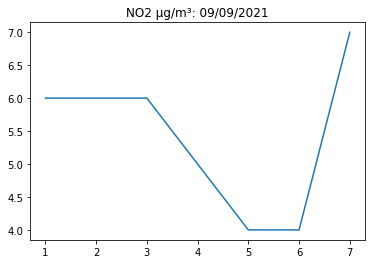

In [4]:
%matplotlib inline
import requests

url = "http://www.mambiente.munimadrid.es/opendata/horario.txt"
resp = requests.get(url)

# lo grabamos en formato csv
with open(path+'horario.txt', 'wb') as output:
    output.write(resp.content)

# Ahora una pequeña grafica
import matplotlib.pyplot as plt
import csv
with open(path+'horario.txt') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        # si la fila es de la estación y el contaminando que queremos....
        if (row[0]+row[1]+row[2]=='28079004' and row[3]=='08'):
            plt.title("NO2 µg/m³: "+row[8]+"/"+row[7]+"/"+row[6])
            hora = 0
            desp = 9
            vs = []
            while (hora<=23 and row[desp+2*hora+1]=='V'):
                vs.append(float(row[desp+2*hora]))
                hora +=1
            plt.plot(range(1,hora+1), vs)
            plt.show()

Rafael Caballero, Enrique Martín y Adrián Riesco